In [ ]:
import pandas as pd
import numpy as np
from math import sqrt, pi, exp
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
dataset = pd.read_csv('diabetes.csv')   # read csv file

In [ ]:
dataset   # display dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.dtypes    # returns data type of each column 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
dataset.describe()    # view basic statistical details

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [ ]:
dataset.isnull().sum()   # check for null values in any column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)    # replace all NaN values with mean of the respective columns
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean(), inplace = True)
dataset['Insulin'].fillna(dataset['Insulin'].mean(), inplace = True)
dataset['BMI'].fillna(dataset['BMI'].mean(), inplace = True)

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Distribution of data

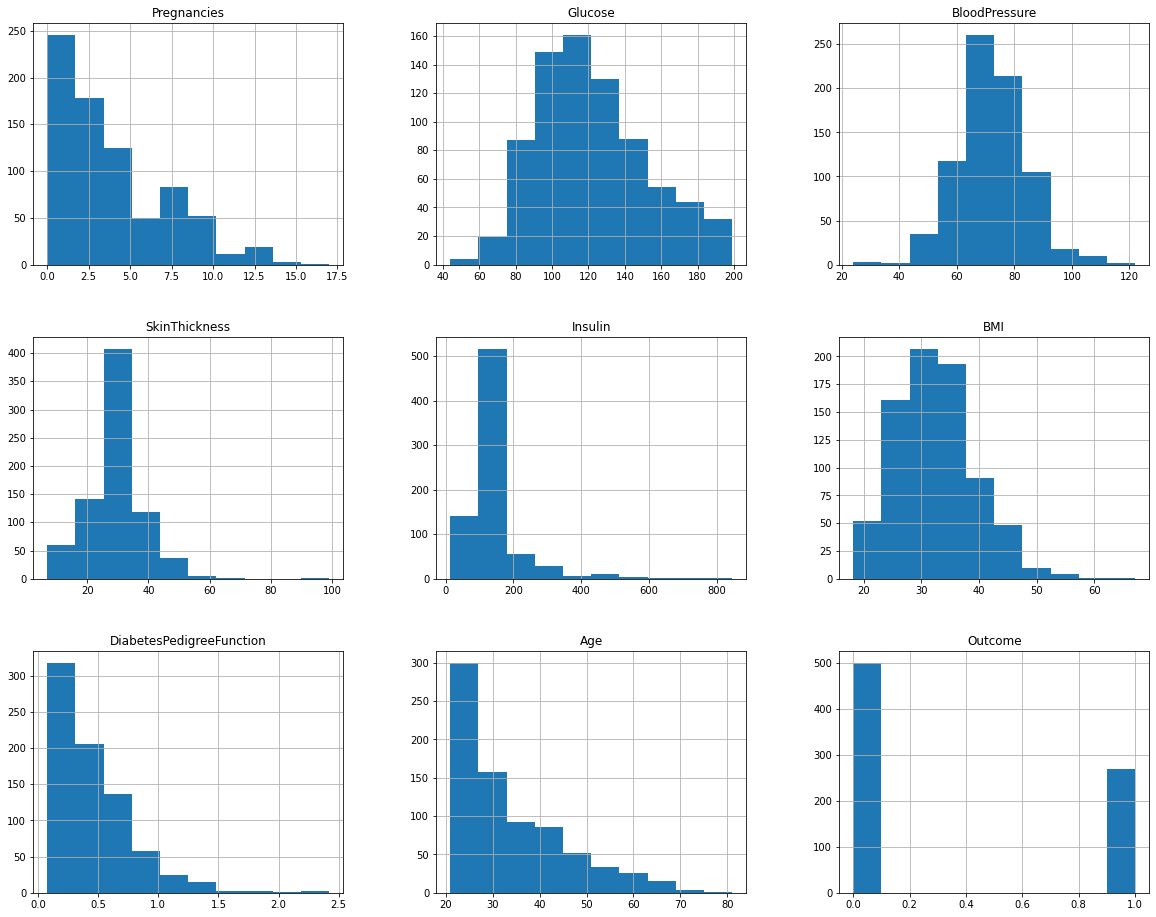

In [ ]:
dataset.hist(figsize=(20,16));    # display histogram

## Split data

In [ ]:
x = dataset.drop('Outcome', axis = 1)   # drop 'Outcome' and store data in x
y = dataset['Outcome']    # store 'Outcome' in y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 17)    # split data into 70% training and 30% testing

## Naive Bayes

In [ ]:
nbModel = GaussianNB()    # create Naive Bayes model

In [ ]:
nbModel.fit(x_train, y_train)   # train the model

GaussianNB()

In [ ]:
confusion_matrix(y_test, nbModel.predict(x_test))

array([[124,  26],
       [ 34,  47]])

In [ ]:
train_mean_pos = x_train[y_train==1].mean()
train_std_pos = x_train[y_train==1].std()

In [ ]:
train_mean_neg = x_train[y_train==0].mean()
train_std_neg = x_train[y_train==0].std()

In [ ]:
def cond_probability(x, mean, std):
    exponent = exp(-((x - mean)**2/(2*std**2)))
    return (1 / (sqrt(2*pi)*std)) * exponent

In [ ]:
def predict(row):
    prob_pos = len(x_train[y_train==1]) / len(x_train)
    
    for i in range(0,len(row)):
        prob_pos = prob_pos * cond_probability(row[i],train_mean_pos[i],train_std_pos[i])
        
    prob_neg = len(x_train[y_train==0]) / len(x_train)
    
    for i in range(0,len(row)):
        prob_neg = prob_neg * cond_probability(row[i],train_mean_neg[i],train_std_neg[i])    
    
    return [prob_pos,prob_neg]

In [ ]:
predictions_raw = []

for row in x_test.values.tolist():
    predictions_raw.append(predict(row))

In [ ]:
predictions_raw[0]

[4.0492781334943976e-14, 3.724482121317609e-12]

In [ ]:
predictions = []
for row in predictions_raw:
    if(row[0]>row[1]):
        predictions.append(1)
    else:
        predictions.append(0)

In [ ]:
accuracy_score(y_test.tolist(),predictions)*100

74.02597402597402

In [ ]:
confusion_matrix(y_test.tolist(), predictions)

array([[124,  26],
       [ 34,  47]])